In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
vaccinetrain=pd.read_csv("training_set_features.csv")

In [3]:
vaccinetest=pd.read_csv("test_set_features.csv")

In [4]:
labels=pd.read_csv("training_set_labels.csv")

In [5]:
print(vaccinetrain.shape)
print(vaccinetest.shape)
print(labels.shape)

(26707, 36)
(26708, 36)
(26707, 3)


In [6]:
vaccinetrain["id"]="train"
vaccinetest["id"]="test"

In [7]:
combinedf=pd.concat([vaccinetrain,vaccinetest],axis=0)

In [8]:
combinedf.isnull().sum().sort_values(ascending=False)

employment_occupation          26896
employment_industry            26605
health_insurance               24502
income_poverty                  8920
doctor_recc_h1n1                4320
doctor_recc_seasonal            4320
rent_or_own                     4078
employment_status               2934
marital_status                  2850
education                       2814
chronic_med_condition           1903
child_under_6_months            1633
health_worker                   1593
opinion_seas_sick_from_vacc     1058
opinion_seas_risk               1013
opinion_seas_vacc_effective      914
opinion_h1n1_vacc_effective      789
opinion_h1n1_sick_from_vacc      770
opinion_h1n1_risk                768
household_children               474
household_adults                 474
behavioral_avoidance             421
behavioral_touch_face            256
h1n1_knowledge                   238
h1n1_concern                     177
behavioral_outside_home          164
behavioral_large_gatherings      159
b

In [9]:
for col in combinedf.drop(["respondent_id","id"],axis=1).columns:
    freq=combinedf[col].value_counts(dropna=False)
    print(freq)
    print('*'*70)

2.0    21318
1.0    16311
3.0     9114
0.0     6495
NaN      177
Name: h1n1_concern, dtype: int64
**********************************************************************
1.0    29227
2.0    19002
0.0     4948
NaN      238
Name: h1n1_knowledge, dtype: int64
**********************************************************************
0.0    50642
1.0     2623
NaN      150
Name: behavioral_antiviral_meds, dtype: int64
**********************************************************************
1.0    38564
0.0    14430
NaN      421
Name: behavioral_avoidance, dtype: int64
**********************************************************************
0.0    49687
1.0     3690
NaN       38
Name: behavioral_face_mask, dtype: int64
**********************************************************************
1.0    44045
0.0     9288
NaN       82
Name: behavioral_wash_hands, dtype: int64
**********************************************************************
0.0    34346
1.0    18910
NaN      159
Name: behavioral_large_g

In [10]:
# here 50% of data is missing so we decided to use KNNImputer
# K Nearest Neighbors is a non-parametric algorithm that uses distance
# calculation like Euclidean to calculate distance btn missing value 
# And closet 5 Neighbors( that means 5 rows ) and smallest distance is imputed .

# For running this imputer on object or categorical data , labelencoding must be done before running imputer. 


In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le=LabelEncoder() 

In [13]:
stringcols=combinedf.drop(["respondent_id","id"],axis=1)

In [14]:
stringcols=stringcols.astype(str).apply(lambda series:pd.Series(
le.fit_transform(series[series.notnull()]),index=series[series.notnull()].index))  ## lamda is anonymous function(there is no name)
# Here when we use a function in backhand it will take it as a numpy array or series but in OOB(i.e object oriented progamming)
# for the safe side we are here mentioning the lamda series:pd.Series.

In [15]:
from sklearn.impute import KNNImputer

In [16]:
imputer=KNNImputer()

In [17]:
stringcolsimp=imputer.fit_transform(stringcols)

In [18]:
stringcols.isnull().sum().sort_values(ascending=False)

h1n1_concern                   0
marital_status                 0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
rent_or_own                    0
opinion_seas_vacc_effective    0
employment_status              0
hhs_geo_region                 0
census_msa                     0
household_adults               0
household_children             0
employment_industry            0
opinion_seas_risk              0
opinion_h1n1_sick_from_vacc    0
h1n1_knowledge                 0
behavioral_touch_face          0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
doctor_recc_h1n1               0
opinion_h1n1_risk              0
doctor_recc_seasonal           0
chronic_med_condition          0
child_unde

In [19]:
stringcolsimp=pd.DataFrame(stringcolsimp,columns=stringcols.columns)

In [20]:
for col in stringcolsimp.columns:
    freq=stringcolsimp[col].value_counts(dropna=False)
    print(freq)

2.0    21318
1.0    16311
3.0     9114
0.0     6495
4.0      177
Name: h1n1_concern, dtype: int64
1.0    29227
2.0    19002
0.0     4948
3.0      238
Name: h1n1_knowledge, dtype: int64
0.0    50642
1.0     2623
2.0      150
Name: behavioral_antiviral_meds, dtype: int64
1.0    38564
0.0    14430
2.0      421
Name: behavioral_avoidance, dtype: int64
0.0    49687
1.0     3690
2.0       38
Name: behavioral_face_mask, dtype: int64
1.0    44045
0.0     9288
2.0       82
Name: behavioral_wash_hands, dtype: int64
0.0    34346
1.0    18910
2.0      159
Name: behavioral_large_gatherings, dtype: int64
0.0    35291
1.0    17960
2.0      164
Name: behavioral_outside_home, dtype: int64
1.0    36175
0.0    16984
2.0      256
Name: behavioral_touch_face, dtype: int64
0.0    38221
1.0    10874
2.0     4320
Name: doctor_recc_h1n1, dtype: int64
0.0    32813
1.0    16282
2.0     4320
Name: doctor_recc_seasonal, dtype: int64
0.0    36978
1.0    14534
2.0     1903
Name: chronic_med_condition, dtype: int64
0

In [21]:
vaccinetraindf=stringcolsimp.loc[0:26706]


In [22]:
vaccinetestdf=stringcolsimp.loc[26707:53415]

In [23]:
print(vaccinetraindf.shape)
print(vaccinetestdf.shape)

(26707, 35)
(26708, 35)


In [24]:
y=labels.seasonal_vaccine
X=vaccinetraindf

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
logit=LogisticRegression(max_iter=3000)

In [27]:
logitmodel=logit.fit(X,y)

In [28]:
logitmodel.score(X,y) # accuracy=0.76

0.7611113191298161

In [29]:
logitpredict=logitmodel.predict(X)

In [30]:
from sklearn.metrics import classification_report

In [31]:
print(classification_report(y,logitpredict))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78     14272
           1       0.75      0.73      0.74     12435

    accuracy                           0.76     26707
   macro avg       0.76      0.76      0.76     26707
weighted avg       0.76      0.76      0.76     26707



In [32]:
from sklearn.metrics import plot_roc_curve

C:\Users\abcd\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


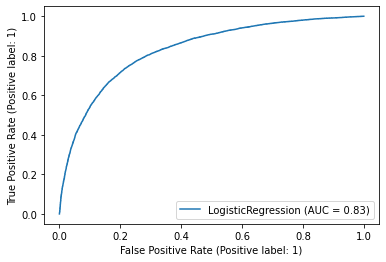

In [33]:
plot_roc_curve(logit,X,y) #AUC=0.67

In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
cross_val_score(logit,X,y).mean()

0.7600630556510246

In [36]:
from sklearn.naive_bayes import GaussianNB # independent features are continious then use this

In [37]:
naive=GaussianNB()

In [38]:
naivemodel=naive.fit(X,y)

In [39]:
naivemodel.score(X,y)   # Accuracy=0.71

0.7113116411427716

In [40]:
naivepredict=naivemodel.predict(X)

In [41]:
print(classification_report(y,naivepredict))

              precision    recall  f1-score   support

           0       0.75      0.69      0.72     14272
           1       0.68      0.73      0.70     12435

    accuracy                           0.71     26707
   macro avg       0.71      0.71      0.71     26707
weighted avg       0.71      0.71      0.71     26707



In [42]:
cross_val_score(naive,X,y).mean()

0.7106753552251603

In [43]:
from sklearn.naive_bayes import CategoricalNB # independent features are discrete then use this

In [44]:
catnb=CategoricalNB()

In [45]:
catnbmodel=catnb.fit(X,y)

In [46]:
catnbmodel.score(X,y)

0.7545961732879021

In [47]:
catnbpredict=catnbmodel.predict(X)

In [48]:
print(classification_report(y,catnbpredict))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77     14272
           1       0.73      0.74      0.74     12435

    accuracy                           0.75     26707
   macro avg       0.75      0.75      0.75     26707
weighted avg       0.75      0.75      0.75     26707



C:\Users\abcd\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


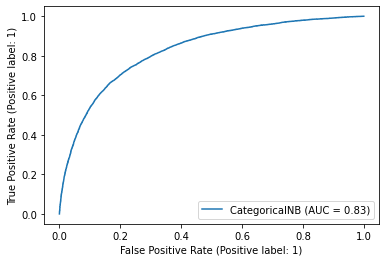

In [49]:
plot_roc_curve(catnb,X,y) #AUC=0.77

In [50]:
cross_val_score(catnb,X,y).mean()

0.7531359485976648

# Final pred

In [51]:
y1=labels.h1n1_vaccine

In [52]:
logitmodel2=logit.fit(X,y1)

In [53]:
logitmodel2.score(X,y1)

0.8279477290597971

In [54]:
logitseasonpredict=logitmodel.predict(vaccinetestdf)

In [55]:
logith1n1predict=logitmodel2.predict(vaccinetestdf)

In [56]:
pd.DataFrame(logitseasonpredict).to_csv("logitseason.csv")

In [57]:
pd.DataFrame(logith1n1predict).to_csv("logith1n1.csv")

In [58]:
catnbmodel2=catnb.fit(X,y1)

In [59]:
catnbmodel2.score(X,y1)

0.8092260456060208

In [60]:
catnbseasonpredict=catnbmodel.predict(vaccinetestdf)

In [61]:
catnbh1n1predict=catnbmodel2.predict(vaccinetestdf)

In [62]:
pd.DataFrame(catnbseasonpredict).to_csv("catnbseason.csv")

In [63]:
pd.DataFrame(catnbh1n1predict).to_csv("catnbh1n1.csv")

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
tree=DecisionTreeClassifier(max_depth=12)

In [66]:
treemodel=tree.fit(X,y)

In [67]:
treemodel.score(X,y) #Accuracy=0.86

0.8608604485715355

In [68]:
treepredict=treemodel.predict(X)

In [69]:
print(classification_report(y,treepredict))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87     14272
           1       0.86      0.84      0.85     12435

    accuracy                           0.86     26707
   macro avg       0.86      0.86      0.86     26707
weighted avg       0.86      0.86      0.86     26707



In [70]:
from sklearn.metrics import plot_roc_curve

C:\Users\abcd\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


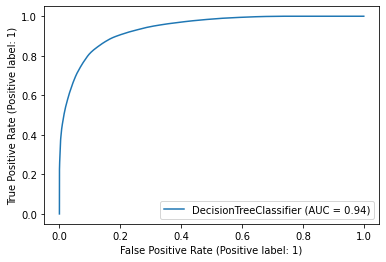

In [71]:
plot_roc_curve(tree,X,y) # AUC=0.94

In [72]:
cross_val_score(tree,X,y).mean() # Cross Validation =0.73

0.7328416589845471

In [73]:
treemodel2=tree.fit(X,y1)

In [74]:
treemodel2.score(X,y1) # Accuracy=0.90

0.9082637510764968

In [75]:
treeseasonpredict=treemodel.predict(vaccinetestdf)

In [76]:
treeh1n1predict=treemodel.predict(vaccinetestdf)

In [77]:
pd.DataFrame(treeseasonpredict).to_csv("treeseason.csv")

In [78]:
pd.DataFrame(treeh1n1predict).to_csv("treeh1n1.csv")

In [79]:
# randomforest

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
rf=RandomForestClassifier(max_depth= 10,n_estimators=600)

In [82]:
rfmodel=rf.fit(X,y)

In [83]:
rfmodel.score(X,y) # Accuracy=0.82

0.8271614183547384

In [84]:
RFpredict=rfmodel.predict(X)

In [85]:
pd.crosstab(y,RFpredict)

col_0,0,1
seasonal_vaccine,,
0,12259,2013
1,2603,9832


In [86]:
print(classification_report(y,RFpredict))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84     14272
           1       0.83      0.79      0.81     12435

    accuracy                           0.83     26707
   macro avg       0.83      0.82      0.83     26707
weighted avg       0.83      0.83      0.83     26707



In [87]:
#cross_val_score(rf,X,y,cv=5).mean()

In [88]:
rfmodel2=rf.fit(X,y1)

In [89]:
rfmodel2.score(X,y1)

0.8766989927734302

In [90]:
rfseasonpredict=rfmodel.predict(vaccinetestdf)

In [91]:
rfh1n1predict=rfmodel.predict(vaccinetestdf)

In [92]:
pd.DataFrame(rfseasonpredict).to_csv("rfseason.csv")

In [93]:
pd.DataFrame(rfh1n1predict).to_csv("rfh1n1.csv")

In [94]:
# Gradient boosting

In [95]:
from sklearn.ensemble import GradientBoostingClassifier

In [96]:
gbm=GradientBoostingClassifier(n_estimators=4000)

In [97]:
gbmmodel=gbm.fit(X,y)

In [98]:
gbmmodel.score(X,y) #Accuracy=0.85

0.8566667914778897

In [99]:
gbmpredict=gbmmodel.predict(X)

In [100]:
pd.crosstab(y,gbmpredict)

col_0,0,1
seasonal_vaccine,,
0,12460,1812
1,2016,10419


In [101]:
print(classification_report(y,gbmpredict))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87     14272
           1       0.85      0.84      0.84     12435

    accuracy                           0.86     26707
   macro avg       0.86      0.86      0.86     26707
weighted avg       0.86      0.86      0.86     26707



In [102]:
#cross_val_score(gbm,X,y,cv=5).mean()

In [103]:
gbmmodel2=gbm.fit(X,y1)

In [104]:
gbmmodel2.score(X,y1)

0.9108473433931179

In [105]:
gbmseasonpredict=gbmmodel.predict(vaccinetestdf)

In [106]:
gbmh1n1predict=gbmmodel.predict(vaccinetestdf)

In [107]:
pd.DataFrame(gbmseasonpredict).to_csv("gbmseason.csv")

In [108]:
pd.DataFrame(gbmh1n1predict).to_csv("gbmh1n1.csv")

In [109]:
# svm

In [110]:
from sklearn.svm import SVC

In [111]:
svc=SVC()

In [112]:
svcmodel=svc.fit(X,y)

In [113]:
svcmodel.score(X,y) # Accuracy=0.77

0.7783352679072902

In [114]:
svcpredict=svc.predict(X)

In [115]:
svcpredict

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [116]:
pd.crosstab(y,svcpredict)

col_0,0,1
seasonal_vaccine,,
0,11580,2692
1,3228,9207


In [117]:
print(classification_report(y,svcpredict))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80     14272
           1       0.77      0.74      0.76     12435

    accuracy                           0.78     26707
   macro avg       0.78      0.78      0.78     26707
weighted avg       0.78      0.78      0.78     26707



In [118]:
#cross_val_score(svc,X,y,cv=5).mean()

In [ ]:
svcmodel2=svc.fit(X,y1)

In [ ]:
svcmodel2.score(X,y1)

In [ ]:
svcseasonpredict=svcmodel.predict(vaccinetestdf)

In [ ]:
svch1n1predict=svcmodel.predict(vaccinetestdf)

In [ ]:
pd.DataFrame(svcseasonpredict).to_csv("svcseason.csv")

In [ ]:
pd.DataFrame(svch1n1predict).to_csv("svch1n1.csv")